In [2]:
# Set up
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
path = '/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Project_Data/'

#show files
# os.listdir(path)

# Power Curves - Introduction
Each turbine has a name plate capacity, or a maximum power output. Based on this name plate capacity, configuration of the turbine, and local climatic conditions(wind speed) power output will vary. First, I wanted to understand how the turbines are supposed to perform.To do this I read in a data-set ("PowerCurveData.csv") that represented design data, and not actual conditions experienced in the field. 

## Describe the meaning and type of data [10 Points]
The reference data contains four variables:
**ID** - An index from the first dataset. Of data type integer.

**Ref_Curve_ID** - A reference curve identification number. All turbine in the field will be associated with a reference curve ID. of data type integer.

**Wind_Speed** - Wind speeds (descritized). Of data type float.

**Active_Power_kW** - The power output of the reference curve at the listed wind speed. Of data type float.

## Verify Data Quality [15 Points]
Since this dataset comes from a simulation there is no missing data, outliers, or other data quality problems. This is likely to be the only "sub data-set" that contains no data quality issues. Other "sub data-sets" will be explained in their sections.

In [3]:
# Next lets look at the power curves
df_pc = pd.read_csv(path + 'PowerCurveData.csv')

print(df_pc.dtypes)
print(df_pc.describe())

ID                   int64
Ref_Curve_ID         int64
Wind_Speed         float64
Active_Power_kW    float64
dtype: object
                ID  Ref_Curve_ID   Wind_Speed  Active_Power_kW
count  2079.000000   2079.000000  2079.000000      2079.000000
mean   1054.581049     21.244348    13.308081      1463.529582
std     624.499278     11.979126     8.110460       969.989072
min       1.000000      1.000000     0.000000         0.000000
25%     520.500000     11.000000     6.500000       409.250000
50%    1040.000000     21.000000    13.000000      1713.000000
75%    1561.500000     33.000000    19.500000      2300.000000
max    2275.000000     40.000000    33.000000      3230.000000


## Visualize Approriate Statistics [10 Points]
I displayed the descriptive statistics below to understand the basic structure of the data. I made a histogram of each Wind_Speed and Active_Power_kW as there are the most meaningful variables in the entire dataset. I also create a box plot for each varaible and plotted these two variables against each other for more insights.

Text(0.5,1,'Histogram of Modeled Wind Speed Distribution')

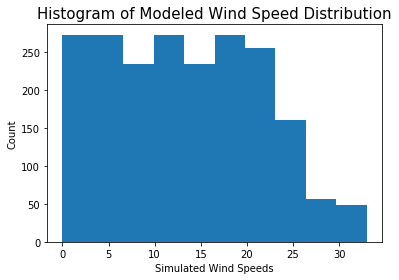

In [9]:
plt.hist(df_pc['Wind_Speed'])
plt.ylabel("Count")
plt.xlabel("Simulated Wind Speeds")
plt.title("Histogram of Modeled Wind Speed Distribution", fontsize=15)

Text(0.5,1,'Histogram of Modeled Active Power Distribution')

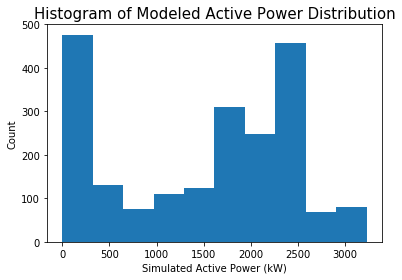

In [10]:
plt.hist(df_pc['Active_Power_kW'])
plt.ylabel("Count")
plt.xlabel("Simulated Active Power (kW)")
plt.title("Histogram of Modeled Active Power Distribution", fontsize=15)

Text(0.5,1,'Box Plot of Wind Speed')

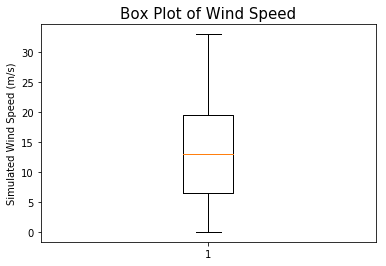

In [20]:
# box plots and scatter plot of wind speed and power
plt.boxplot(df_pc["Wind_Speed"])
plt.ylabel("Simulated Wind Speed (m/s)")
plt.title("Box Plot of Wind Speed", fontsize=15)

Text(0.5,1,'Box Plot of Power Output')

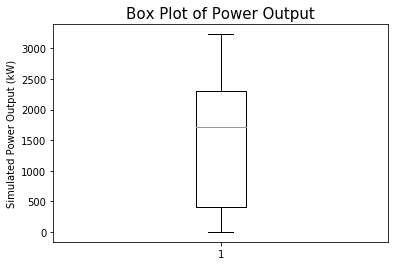

In [21]:
plt.boxplot(df_pc["Active_Power_kW"])
plt.ylabel("Simulated Power Output (kW)")
plt.title("Box Plot of Power Output", fontsize=15)

Text(0.5,1,'Wind Speed vs Active Power')

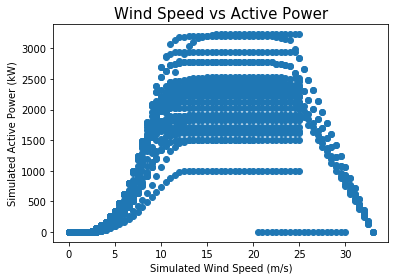

In [22]:
# Scatter Plot of Wind Speed vs Power Output
plt.scatter(df_pc["Wind_Speed"], df_pc["Active_Power_kW"])
plt.ylabel("Simulated Active Power (kW)")
plt.xlabel("Simulated Wind Speed (m/s)")
plt.title("Wind Speed vs Active Power", fontsize=15)

## Plotting Reference Power Curves
### Visulatize the most interesting attribute (1 of 5) [15 Points]
After investigating some other reference tables we learned that all of the wind turbines at Logan's Gap were built based on Reference Curve 18. I wanted to create a function that allows me to easily plot the power reference curve for any one turbine, group of turbines, or all turbines.

Below is a function that can take either a single turbine number, a list of numbers, or the string variable "all". If a single number is entered, the power curve for that reference ID is plotted. If a list of numbers are entered, then the power curve for each reference ID is plotted. If "all" is entered then all of the power curves are plotted.

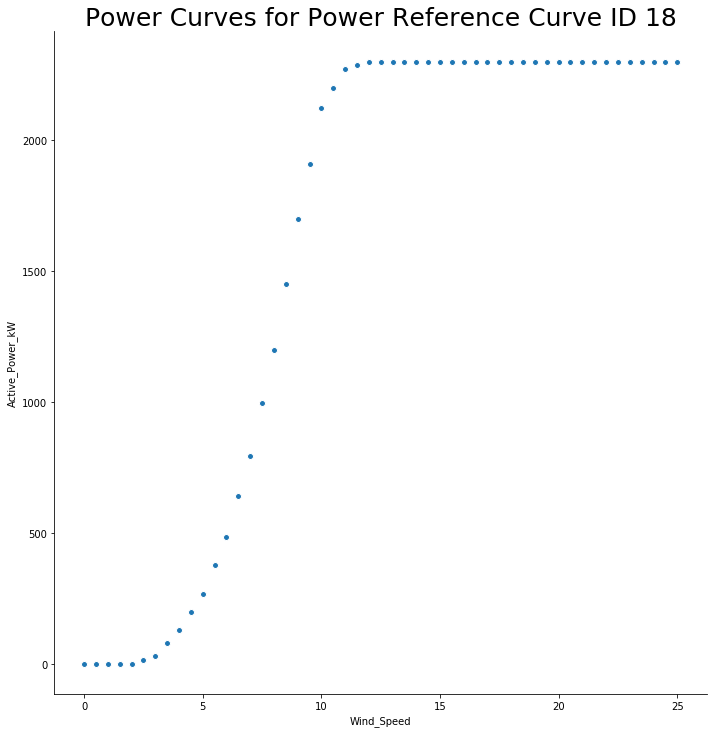

In [6]:
def plot_power_curve(selection):
    if selection != "all":
        if type(selection) == list:
            this = df_pc[df_pc["Ref_Curve_ID"].isin(selection)]
            sbn.pairplot(x_vars=["Wind_Speed"], y_vars=["Active_Power_kW"], data=this, size=10, hue='Ref_Curve_ID')
            plt.title("Power Curves for Power Reference Curve ID {}".format(selection), size=25)             
        else:
            this = df_pc[df_pc["Ref_Curve_ID"] == selection]
            sbn.pairplot(x_vars=["Wind_Speed"], y_vars=["Active_Power_kW"], data=this, size=10)
            plt.title("Power Curves for Power Reference Curve ID {}".format(selection), size=25)
                    
    else:
        sbn.pairplot(x_vars=["Wind_Speed"], y_vars=["Active_Power_kW"], data=df_pc, size=10, hue='Ref_Curve_ID')
        plt.title("Power Curves by Curve ID", size=25)
        
#show some power curves
plot_power_curve(18)

# Moving Forward - Marring Real Data to Reference Models
The previous data set did not meet the complexity requirements, however, there was still very valuable information gleaned that data-set. We can use the power curve information to compare turbine opeartion to its theoretical operation. Next I will look at two other data-sets that will meet the complexity requirements. These two data-sets will allow me to get more information about power output at Logan's Gap, and start to understand how variables influence each other. 

## Describe the meaning and type of data [10 Points]
## Investigation of powercurve2017.csv
This data-set is 159 MB in size and has 12,517,788 rows of data. It contains the following variables during the year of 2017:

**Timestamp** - A timestamp indicating when readings were taken. This is treated as an object in python.

**StationID** - A station reference ID. Of data type integer. 

**ActivePower** - Active power reading. Of data type float.

**WindSpeed** - Wind speed reading. Of data type float.


In [4]:
df_main = pd.read_csv(path +  "powercurve2017.csv")
df_main.columns = ["Timestamp", "StationID", "ActivePower", "WindSpeed"]

print(df_main.dtypes)
print("\n")

print("Descritption of all variables")
print(df_main.describe())
print("\n")

print("Active Power descibed as float")
print(df_main['ActivePower'].describe().apply(lambda x: format(x, 'f')))

print("\n")
print("Wind Speed described as float")
print(df_main['WindSpeed'].describe().apply(lambda x: format(x, 'f')))


Timestamp       object
StationID        int64
ActivePower    float64
WindSpeed      float64
dtype: object


Descritption of all variables
          StationID   ActivePower     WindSpeed
count  3.129447e+06  3.129444e+06  3.129443e+06
mean   2.304171e+06  1.064031e+03  7.439152e+00
std    1.733613e+01  8.934292e+02  3.810226e+00
min    2.304142e+06 -2.803197e+01  0.000000e+00
25%    2.304156e+06  2.067956e+02  4.723679e+00
50%    2.304171e+06  8.610899e+02  7.229190e+00
75%    2.304187e+06  2.073654e+03  1.015735e+01
max    2.304201e+06  2.428901e+03  3.249024e+01


Active Power descibed as float
count    3129444.000000
mean        1064.030847
std          893.429186
min          -28.031970
25%          206.795575
50%          861.089900
75%         2073.653750
max         2428.901000
Name: ActivePower, dtype: object


Wind Speed described as float
count    3129443.000000
mean           7.439152
std            3.810226
min            0.000000
25%            4.723679
50%            7.229

## Verify Data Quality [15 Points]
This data set contains missing data which is represented by the the value "NaN". However, there are very few instances where there is missing data (as shown below). A scatter plot matrix was used to look for data outliers. Based on the scatter plots there do no appear to be any outliers. There are some unusual looking data when wind speed are low (around 0). This is because each turbine has a "cut-in speed", or minimum speed to acually turn the turbine to produce power. Any wind speed less than this will result in no power output. There are some very high wind speeds, but they are very possible speeds that a wind turbine could experience. As a result, no action will be taken to alter or remove these values.

In [27]:
print("Count of missing data by column")
df_main.isnull().sum()

Count of missing data by column


Timestamp      0
StationID      0
ActivePower    3
WindSpeed      4
dtype: int64

Text(0.5,1,'Pair Plot of Wind Speed and Active Power for the first 10,000 observations')

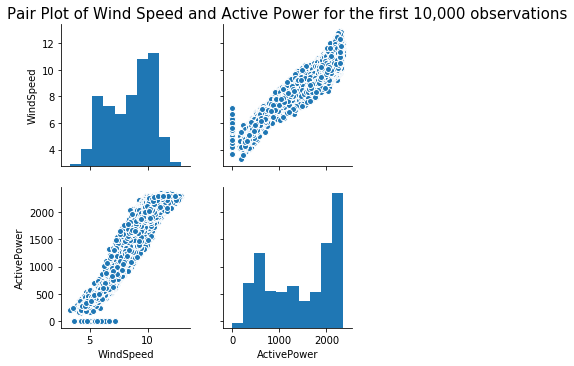

In [6]:
this = df_main[["WindSpeed", "ActivePower"]]
this.head()
sbn.pairplot(this[:10000])
plt.title("Pair Plot of Wind Speed and Active Power for the first 10,000 observations", fontsize=15)

## Visualize Approriate Statistics [10 Points]
Histograms and boxplots were created to investigate the descriptive statistics for ActivePower and WindSpeed since they are the most interesting variables in this dataset.

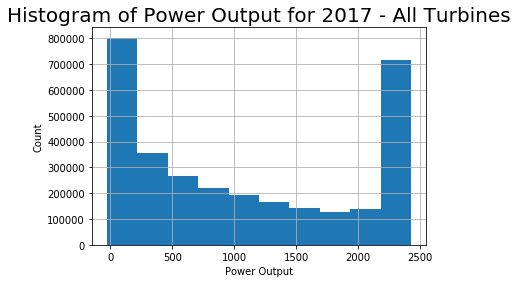

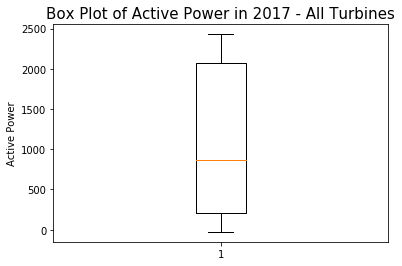

In [33]:
# Histogram of powerout for 2017
plt.hist(df_main['ActivePower'].dropna())
plt.title('Histogram of Power Output for 2017 - All Turbines', fontsize=20)
plt.ylabel('Count')
plt.xlabel('Power Output')
plt.grid(True)
plt.figure(figsize=(15,15))
plt.show()

plt.boxplot(df_main['ActivePower'].dropna())
plt.ylabel("Active Power")
plt.title("Box Plot of Active Power in 2017 - All Turbines", fontsize=15)
plt.figure(figsize=(15,15))

plt.show()

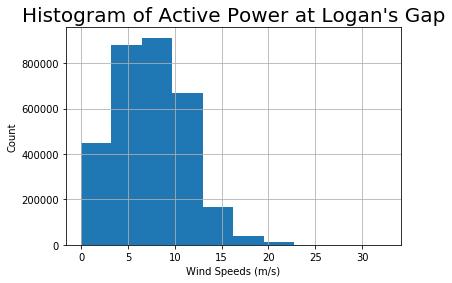

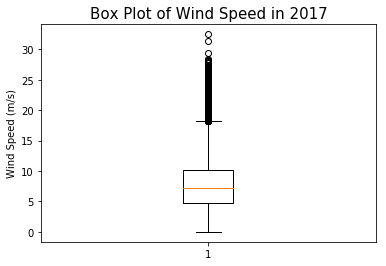

In [35]:
# Histogram of wind speed
plt.hist(df_main['WindSpeed'].dropna())
plt.title("Histogram of Active Power at Logan's Gap", fontsize=20)
plt.ylabel("Count")
plt.xlabel("Wind Speeds (m/s)")
plt.grid(True)
plt.show()

plt.boxplot(df_main['WindSpeed'].dropna())
plt.ylabel("Wind Speed (m/s)")
plt.title("Box Plot of Wind Speed in 2017", fontsize=15)
plt.figure(figsize=(15,15))
plt.show()

# Comparing Power Output to Modeled Values and Wind Speeds
## Visulatize the most interesting attribute (1 of 5) [15 Points]
Below are some graphs that plot wind speed versus power output (shown as blue dots). Modeled/Design data is shown as the red line. There appear to be some problematic data points (for example, high power output when the wind speed is very low). I would think that these values are not possible.

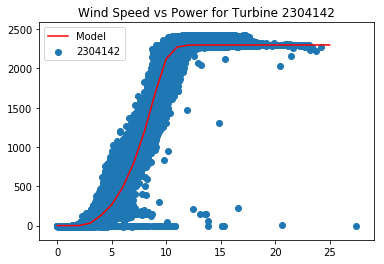

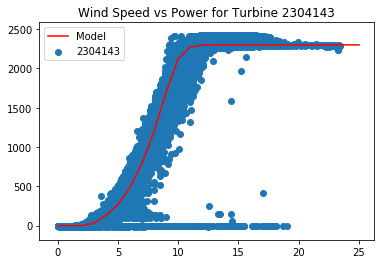

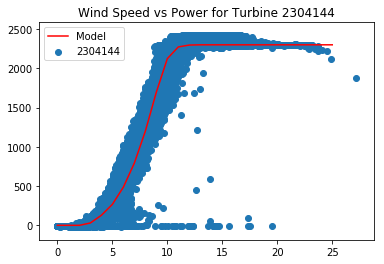

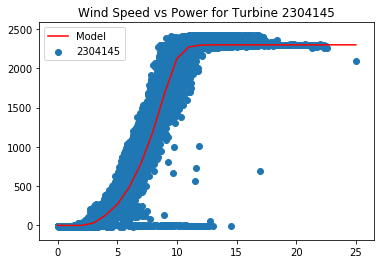

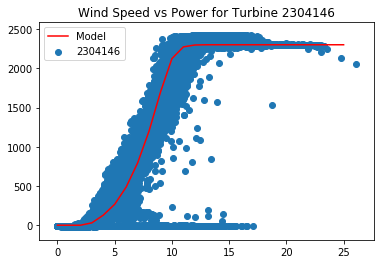

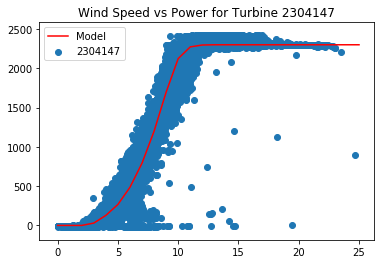

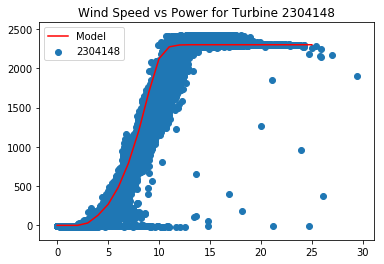

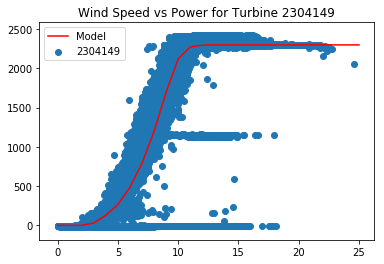

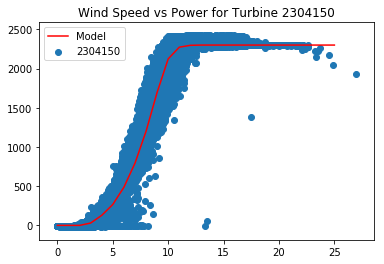

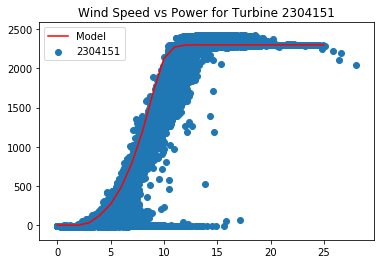

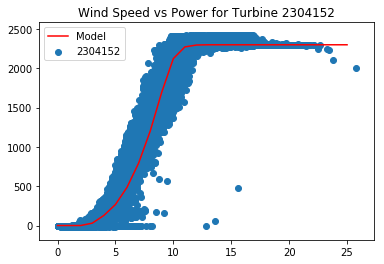

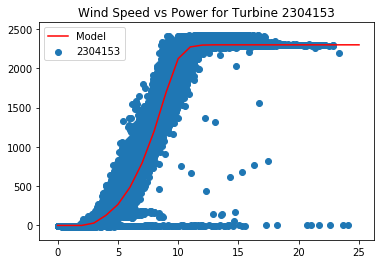

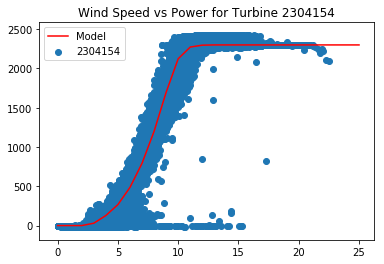

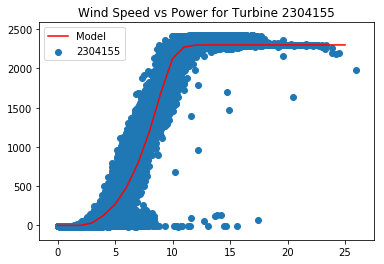

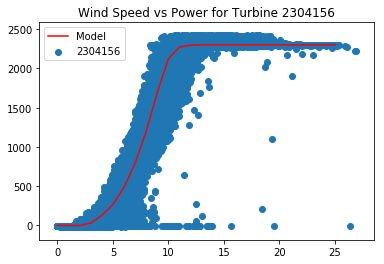

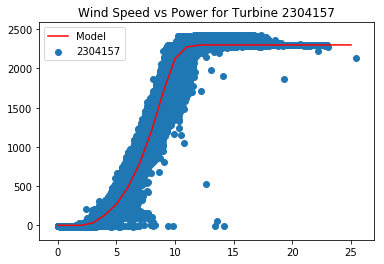

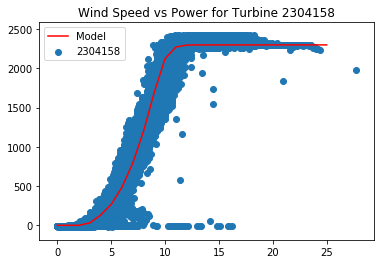

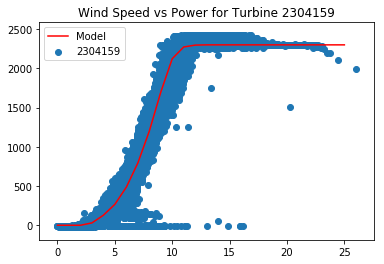

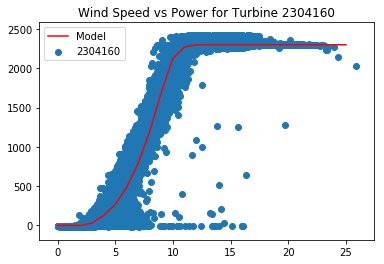

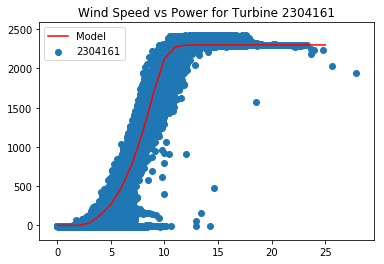

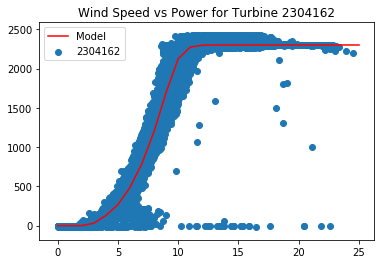

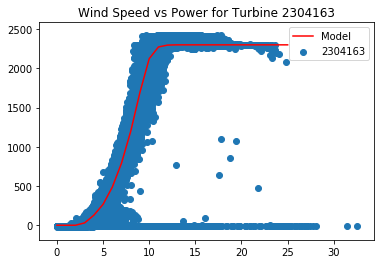

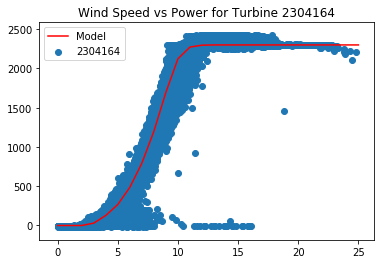

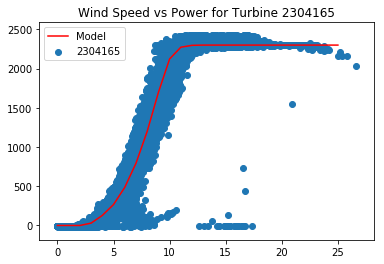

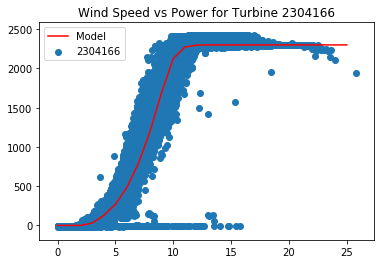

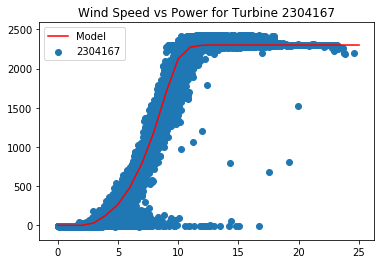

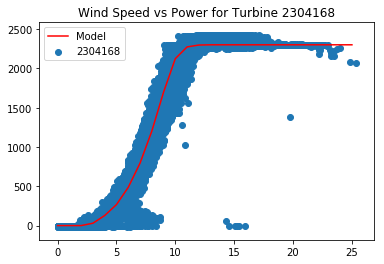

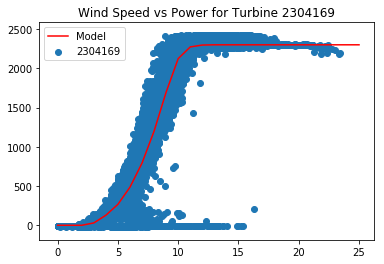

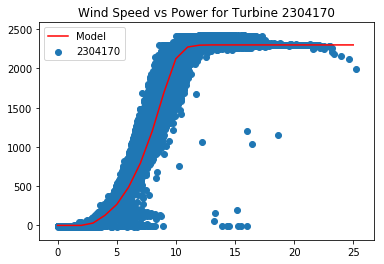

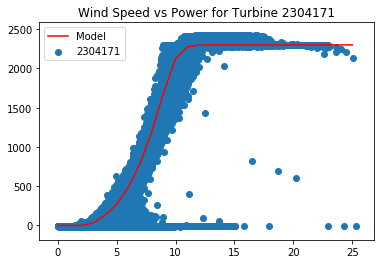

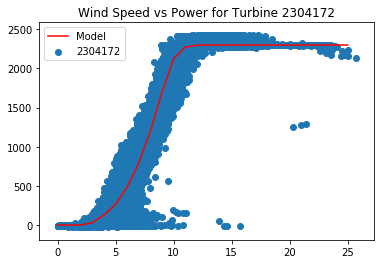

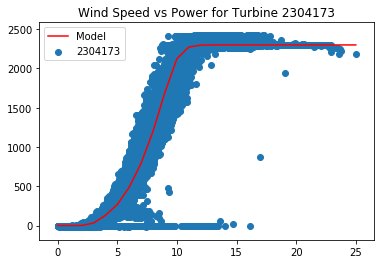

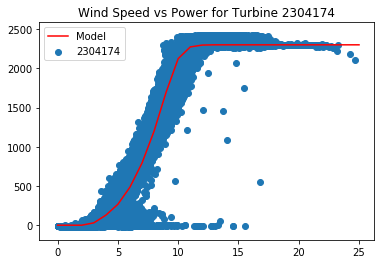

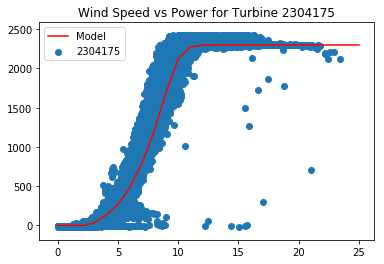

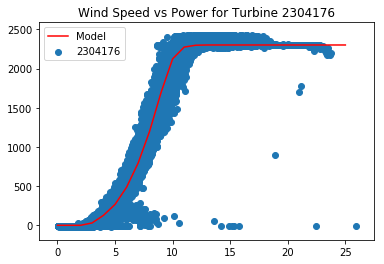

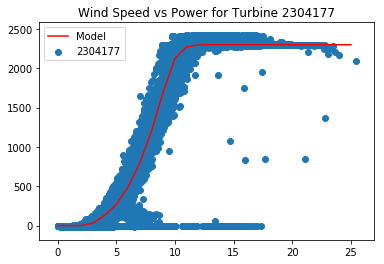

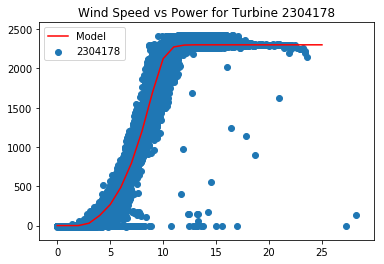

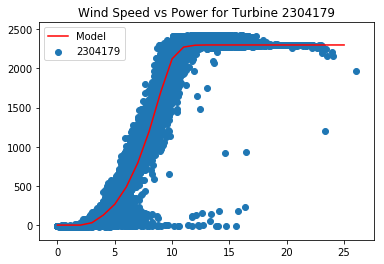

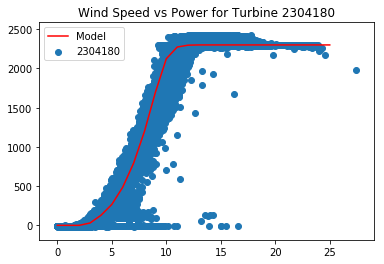

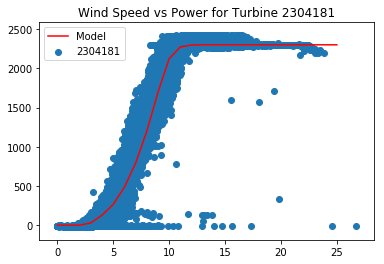

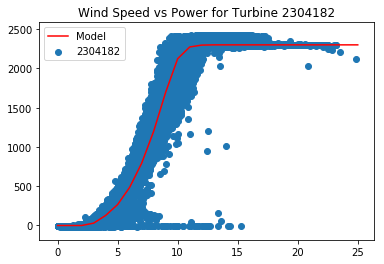

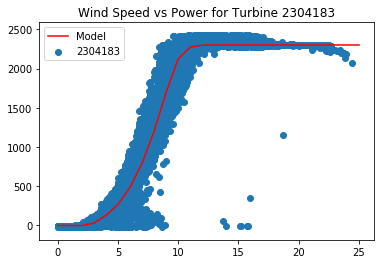

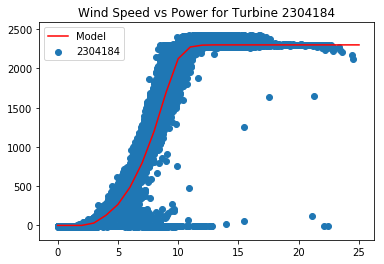

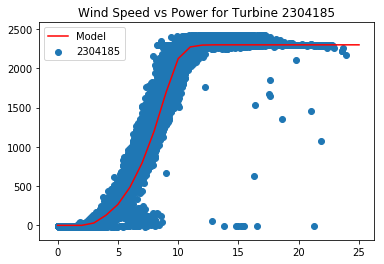

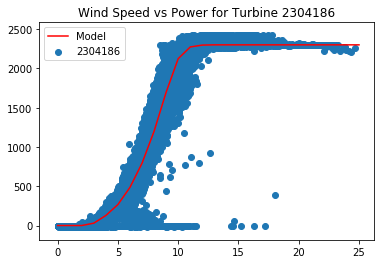

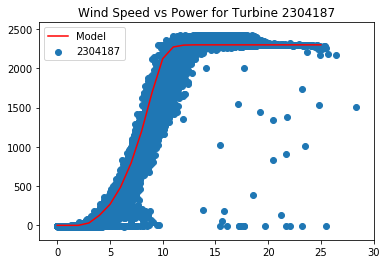

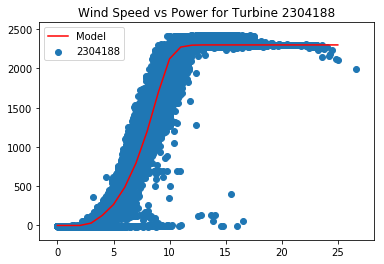

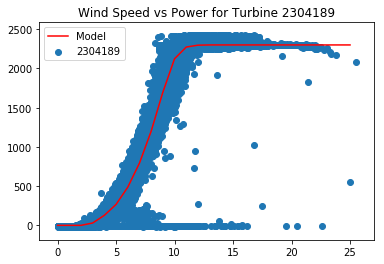

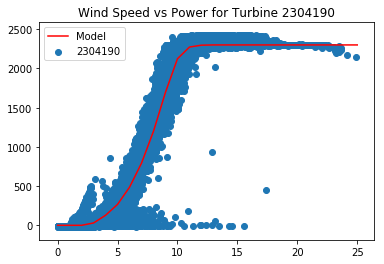

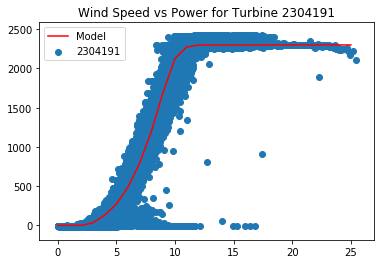

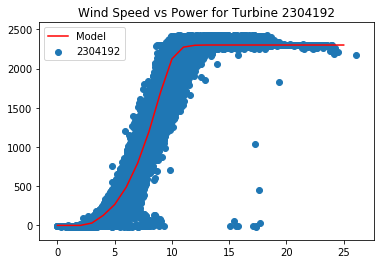

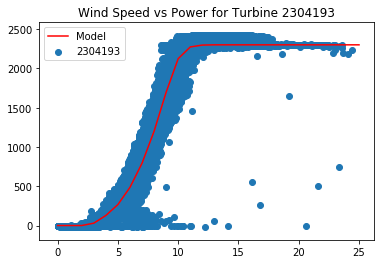

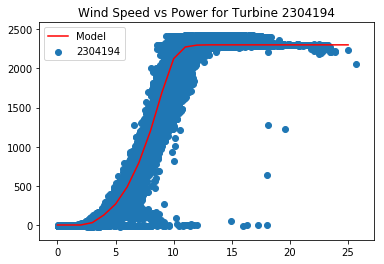

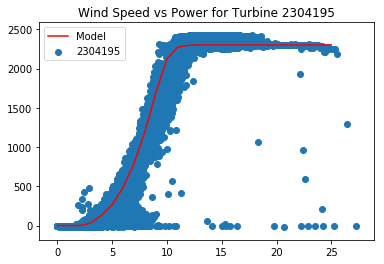

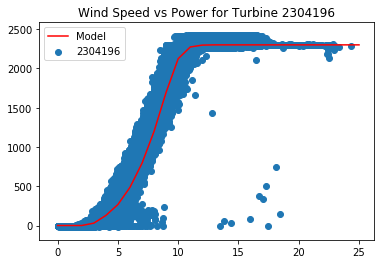

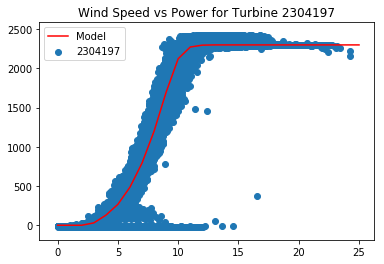

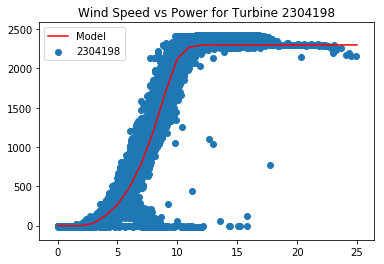

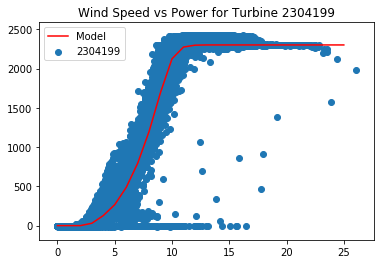

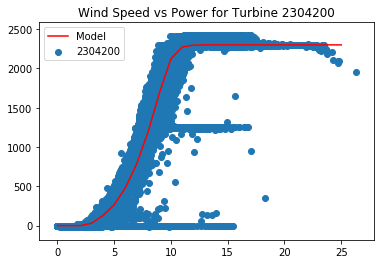

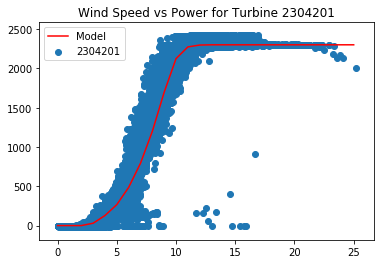

In [13]:
# What are the columns
by_turbine = df_main.groupby('StationID')
ref = df_pc[df_pc['Ref_Curve_ID'] == 18]

for name, group in by_turbine:
    plt.plot(ref['Wind_Speed'], ref['Active_Power_kW'], 'r-', label='Model')
    plt.scatter(group['WindSpeed'], group['ActivePower'], label=name)
    plt.title("Wind Speed vs Power for Turbine " + str(name))
    plt.legend()
    plt.show()


# Other Variables that Impact Power Output
## Investigation of tblSCTurbine.csv

## Describe the meaning and type of data [10 Points]
This data-set is over 4 GB in size. It cannot be read into memory on my machine. To start, I will only read in 100,000 lines of data to get an idea of the underlying structure. We may move to a spark installation so that we can handle such a large amount of data.

This data set contains information not only on wind speed and power production for each turbine, but also other information that could be usedful for modelling purposes. Other variables in this dataset include:

'Name' - The turnine name. Treated as an object.

'TimeStamp' - Timestamp of Measurement. Treated as an object.

'wtc_CurTime_endvalue' - Another timestamp value. Treated as an object.

'wtc_SecAnemo_mean'- Secondary anemometer (mechanic). Of data type float.

'wtc_YawPos_mean' - Yaw Position. Of data type float.

'wtc_GenRpm_mean' - Generator RPM. Of data type float.

'wtc_HubLubGr_mean' - Low grease level, hub lubrication. Of data type float.

'wtc_IceDetec_mean' - Ice detector value. Of data type float.

'wtc_IMidBa_mean' - Mean valve current, blade B, coil a. Of data type float.

'wtc_IMidCa_mean' - Mean valve current, blade C, coil a. Of data type float.

'wtc_IMidAa_mean' - Mean valve current, blade A, coil a. Of data type float.

'wtc_MainSRpm_mean' - Main Shaft RPM. Of data type float.

'wtc_PitchRef_mean' - Pitch Reference (Not Used). Of data type float.

'wtc_PitchRef_BladeA_mean' - Pitch reference blade A. Of data type float.

'wtc_PitchRef_BladeB_mean' - Pitch reference blade B. Of data type float.

'wtc_PitchRef_BladeC_mean' - Pitch reference blade C. Of data type float.

'wtc_PitcRefA_mean' - Blade A position reference. Of data type float.

'wtc_PriAnemo_mean' - Primary anemometer value. Of data type float.

'wtc_PWMBa_mean' - No description available. Of data type float.

'wtc_PWMCa_mean' - No description available. Of data type float.

'wtc_PWMAa_mean' - No description available. Of data type float.

'wtc_HubAnIn5_mean' - Hub Analog voltage input 5. Of data type float.

'wtc_HubAnIn6_mean' - Hub Analog voltage input 6. Of data type float.

'wtc_HubAnIn7_mean' - Hub Analog voltage input 7. Of data type float.

'wtc_NacHumid_mean' - Relative humidity measured in nacelle. Of data type float.

'wtc_TwrHumid_mean' - Humidity in Tower. Of data type float.

'wtc_VisMeter_endvalue' - Visibility. Of data type float.

'wtc_PitcPosA_mean' - Blade A Position. Of data type float.

'wtc_PitcPosB_mean' - Blade B Position. Of data type float.

'wtc_PitcPosC_mean' - Blade C Position. Of data type float.

'wtc_PowerRef_endvalue' - Turbine Power Refernce. Of data type float.

'wtc_ReactRef_endvalue' - Turbine reactive power reference (setpoint). Of data type float.

'wtc_ScYawPos_mean' - Scientific: Yaw position. Of data type float.

'wtc_PrWindSp_mean' - Primary Wind Speed. Of data type float.

'wtc_SeWindSp_mean' - Secondary Wind Speed. Of data type float.

'wtc_AcWindSp_mean' - Average of wind speed mesature by turbine. Of data type float.

'wtc_NacelPos_mean' - Nacelle position. (Direction in relation to North). Of data type float.

'wtc_TetAnemo_mean' - Tertiary anemometer. Of data type float.

'wtc_TetAnFrq_mean' - Tertiary anemometer, raw signal. Of data type float.

'wtc_TowerFrq_Frequenc_mean' - Tower frequency detected by GS1. Of data type float.

'wtc_BoostAva_mean' - The current boost allowed. Of data type float.

First the data is read in and then the columns are shown to help understand what variables are available. Then all of the unique turbine names are shown (only a sub-selection of turbines made it into this first 100,000 rows.

Then basic summary statistics were shown for each variable in this data set.

In [5]:
# Now I need to find a reference for the STATION ID to a turbine name
df_main2 = pd.read_csv(path + "tblSCTurbine.csv", nrows=100000)
print(df_main2.dtypes)
print("\n")
print("Uniques Turbine Names")
print(df_main2['Name'].unique())
print("\n")
print(df_main2.describe())

Name                           object
TimeStamp                      object
wtc_CurTime_endvalue           object
wtc_SecAnemo_mean             float64
wtc_YawPos_mean               float64
wtc_GenRpm_mean               float64
wtc_HubLubGr_mean             float64
wtc_IceDetec_mean             float64
wtc_IMidBa_mean               float64
wtc_IMidCa_mean               float64
wtc_IMidAa_mean               float64
wtc_MainSRpm_mean             float64
wtc_PitchRef_mean             float64
wtc_PitchRef_BladeA_mean      float64
wtc_PitchRef_BladeB_mean      float64
wtc_PitchRef_BladeC_mean      float64
wtc_PitcRefA_mean             float64
wtc_PriAnemo_mean             float64
wtc_PWMBa_mean                float64
wtc_PWMCa_mean                float64
wtc_PWMAa_mean                float64
wtc_HubAnIn5_mean             float64
wtc_HubAnIn6_mean             float64
wtc_HubAnIn7_mean             float64
wtc_NacHumid_mean             float64
wtc_TwrHumid_mean             float64
wtc_VisMeter

## Verify Data Quality [15 Points]
This data set has significantly more "NaN" data than previous data-sets. I opted to drop columns that had all 100,000 observations of "NaN" as these provide no value. For the remaining "NaN" data I will replace them with the mean value of that column. Once again, a pairwise plot was used to look for outliers in the data-set once "NaN" data had been removed.

Since the data-set had so many variables, I select 8 variables for investigation. The selected variables are:
* "wtc_AcWindSp_mean"

* "wtc_YawPos_mean"

* "wtc_PitchRef_BladeA_mean"

* "wtc_PriAnemo_mean"

* "wtc_PowerRef_endvalue"

* "wtc_GenRpm_mean"

* "wtc_TwrHumid_mean"

* "wtc_NacelPos_mean"

Null data count of original data set.
Name                               0
TimeStamp                          0
wtc_CurTime_endvalue             148
wtc_SecAnemo_mean                243
wtc_YawPos_mean                  244
wtc_GenRpm_mean                  243
wtc_HubLubGr_mean             100000
wtc_IceDetec_mean             100000
wtc_IMidBa_mean               100000
wtc_IMidCa_mean               100000
wtc_IMidAa_mean               100000
wtc_MainSRpm_mean                244
wtc_PitchRef_mean             100000
wtc_PitchRef_BladeA_mean         244
wtc_PitchRef_BladeB_mean         244
wtc_PitchRef_BladeC_mean         244
wtc_PitcRefA_mean                244
wtc_PriAnemo_mean                244
wtc_PWMBa_mean                100000
wtc_PWMCa_mean                100000
wtc_PWMAa_mean                100000
wtc_HubAnIn5_mean             100000
wtc_HubAnIn6_mean             100000
wtc_HubAnIn7_mean             100000
wtc_NacHumid_mean             100000
wtc_TwrHumid_mean                243


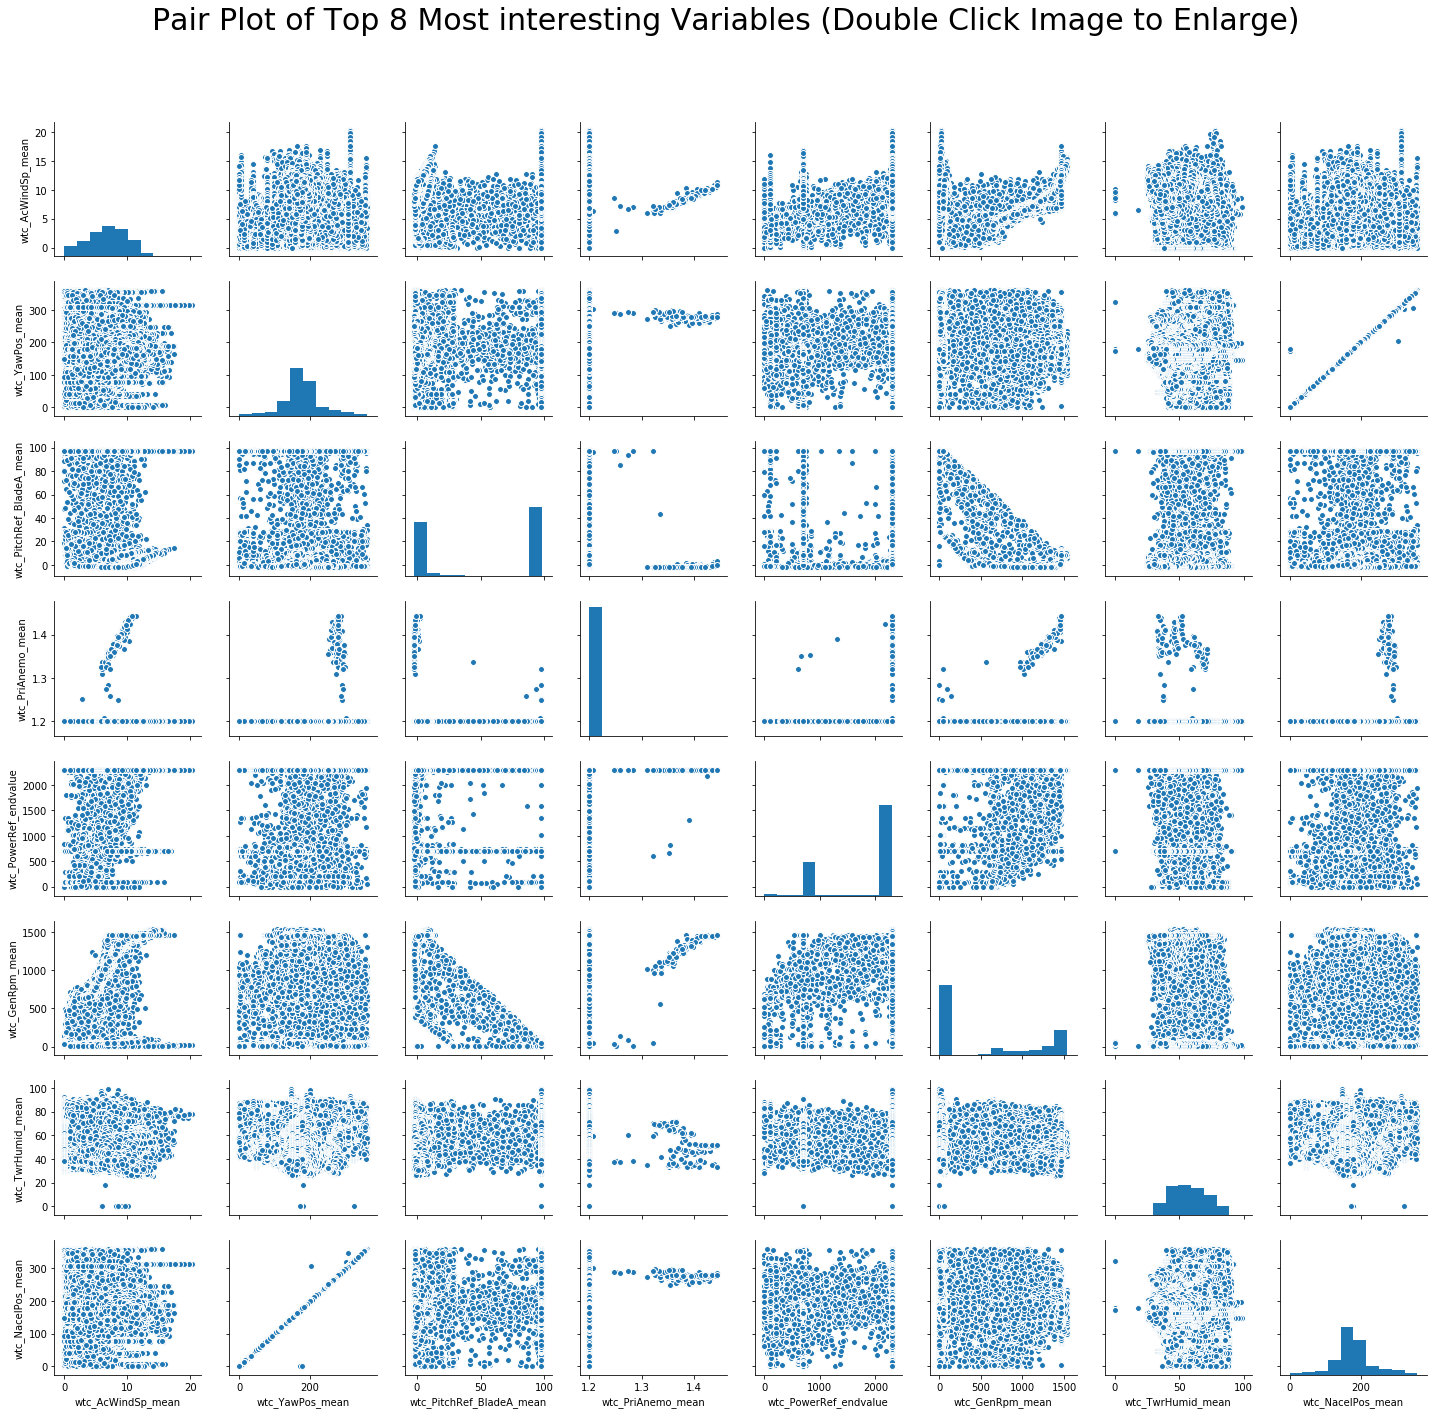

In [21]:
print("Null data count of original data set.")
print(df_main2.isnull().sum())
print("\n")

#drop object columns
df_cleaned = df_main2.dropna(thresh=300, axis=1)
df_cleaned = df_cleaned.drop(columns="Name")
df_cleaned = df_cleaned.drop(columns="TimeStamp")
df_cleaned = df_cleaned.drop(columns="wtc_CurTime_endvalue")
df_colnames = df_cleaned.columns #save the column names

#fillin in missing values
filler = Imputer(missing_values='NaN', strategy='mean')
filler.fit(df_cleaned)
df_cleaned = filler.transform(df_cleaned)

#transform back into a dataframe
df_cleaned = pd.DataFrame(df_cleaned)
df_cleaned.columns = df_colnames # reapply the column names
# print(type(df_cleaned))

print("Null data count after variable transormation")
print(df_cleaned.isnull().sum())

#plot the data
#select which data we want to plot
myvals = ["wtc_AcWindSp_mean" , "wtc_YawPos_mean", "wtc_PitchRef_BladeA_mean", 
          "wtc_PriAnemo_mean", "wtc_PowerRef_endvalue", "wtc_GenRpm_mean", "wtc_TwrHumid_mean",
         "wtc_NacelPos_mean"]
sbn.pairplot(df_cleaned[myvals]) #only plot float values
plt.subplots_adjust(top = 0.9)
plt.suptitle("Pair Plot of Top 8 Most interesting Variables (Double Click Image to Enlarge)", fontsize=30)
plt.show()

## Visualize appropriate statistics [10 Points]
Note that very few values are normally distributed, and that several have bi-modal distributions. In order to get a better understanding of the distribution of the 8 chosen points a boxplot was created for each.

Text(0.5,1,'Box plot for wtc_PriAnemo_mean')

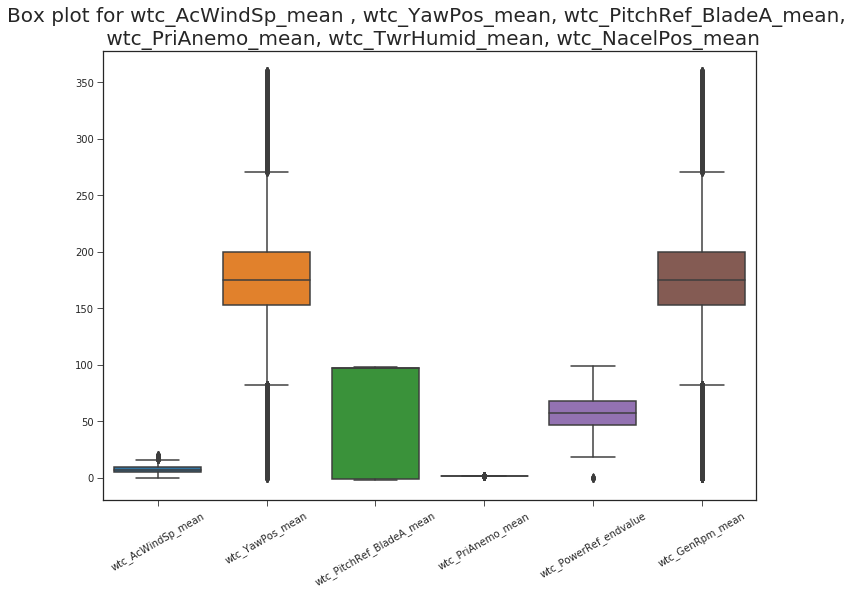

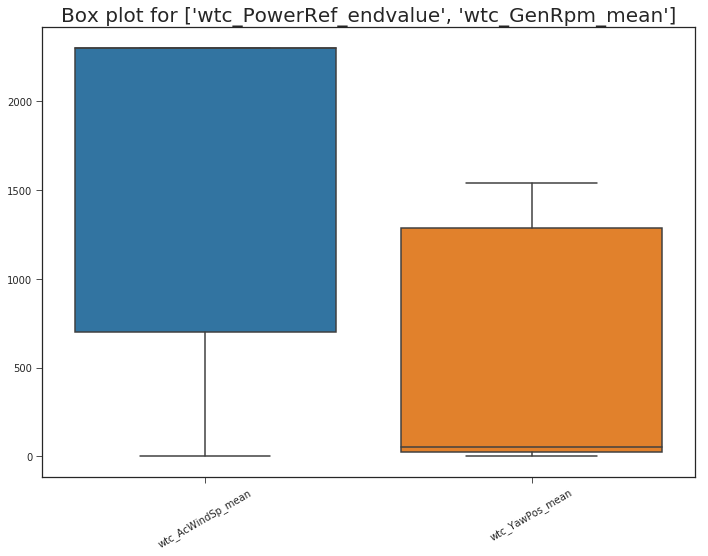

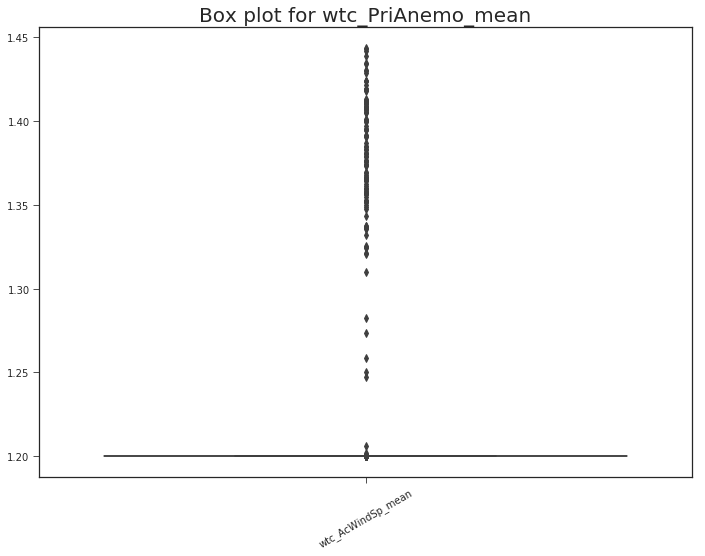

In [46]:
#code borrowed from https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
#code borrowed from https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

set1 = ["wtc_AcWindSp_mean" , "wtc_YawPos_mean", "wtc_PitchRef_BladeA_mean", 
          "wtc_PriAnemo_mean", "wtc_TwrHumid_mean",
         "wtc_NacelPos_mean"]

set2 = ["wtc_PowerRef_endvalue", "wtc_GenRpm_mean"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sbn.boxplot(data=df_cleaned[set1])
ax.set_xticklabels(rotation=30, labels=myvals)
plt.title("Box plot for wtc_AcWindSp_mean , wtc_YawPos_mean, wtc_PitchRef_BladeA_mean, \n wtc_PriAnemo_mean, wtc_TwrHumid_mean, wtc_NacelPos_mean", fontsize=20)


fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sbn.boxplot(data=df_cleaned[set2])
ax.set_xticklabels(rotation=30, labels=myvals)
plt.title("Box plot for " + str(set2), fontsize=20)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sbn.boxplot(data=df_cleaned["wtc_PriAnemo_mean"])
ax.set_xticklabels(rotation=30, labels=myvals)
plt.title("Box plot for wtc_PriAnemo_mean", fontsize=20)

# Investigaiton of varaible correlations
## Visualize relationships between attributes [15 Points]
Finally I wanted to understand how each variable in the data set was correlated with each other variable. I opted to show this information in both a tabular and graphical format.

In [47]:
# Lets see how some of this data correlated
df_main2.corr()
#There is a lot of NA data. I will drop columns with NA to see what happens.

,wtc_SecAnemo_mean,wtc_YawPos_mean,wtc_GenRpm_mean,wtc_HubLubGr_mean,wtc_IceDetec_mean,wtc_IMidBa_mean,wtc_IMidCa_mean,wtc_IMidAa_mean,wtc_MainSRpm_mean,wtc_PitchRef_mean,...,wtc_ReactRef_endvalue,wtc_ScYawPos_mean,wtc_PrWindSp_mean,wtc_SeWindSp_mean,wtc_AcWindSp_mean,wtc_NacelPos_mean,wtc_TetAnemo_mean,wtc_TetAnFrq_mean,wtc_TowerFrq_Frequenc_mean,wtc_BoostAva_mean
wtc_SecAnemo_mean,1.000000e+00,-8.272123e-02,4.986059e-01,NaN,NaN,NaN,NaN,NaN,4.986290e-01,NaN,...,NaN,8.154370e-02,7.668186e-01,9.999979e-01,8.373585e-01,-8.270651e-02,NaN,1.502009e-14,1.478245e-01,9.901547e-02
wtc_YawPos_mean,-8.272123e-02,1.000000e+00,5.386099e-02,NaN,NaN,NaN,NaN,NaN,5.384951e-02,NaN,...,NaN,1.085599e-01,-4.581449e-03,-8.271703e-02,3.120802e-03,9.999331e-01,NaN,-2.586316e-14,-6.771574e-02,5.862956e-03
wtc_GenRpm_mean,4.986059e-01,5.386099e-02,1.000000e+00,NaN,NaN,NaN,NaN,NaN,9.999973e-01,NaN,...,NaN,1.036879e-01,5.699439e-01,4.986140e-01,5.638399e-01,5.385389e-02,NaN,-8.762689e-14,3.247868e-01,7.692995e-02
wtc_HubLubGr_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IceDetec_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IMidBa_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IMidCa_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_IMidAa_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wtc_MainSRpm_mean,4.986290e-01,5.384951e-02,9.999973e-01,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,...,NaN,1.036544e-01,5.699597e-01,4.986371e-01,5.638593e-01,5.384265e-02,NaN,4.543671e-14,3.249945e-01,7.692752e-02
wtc_PitchRef_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'Correlation Heat Map of all Data')

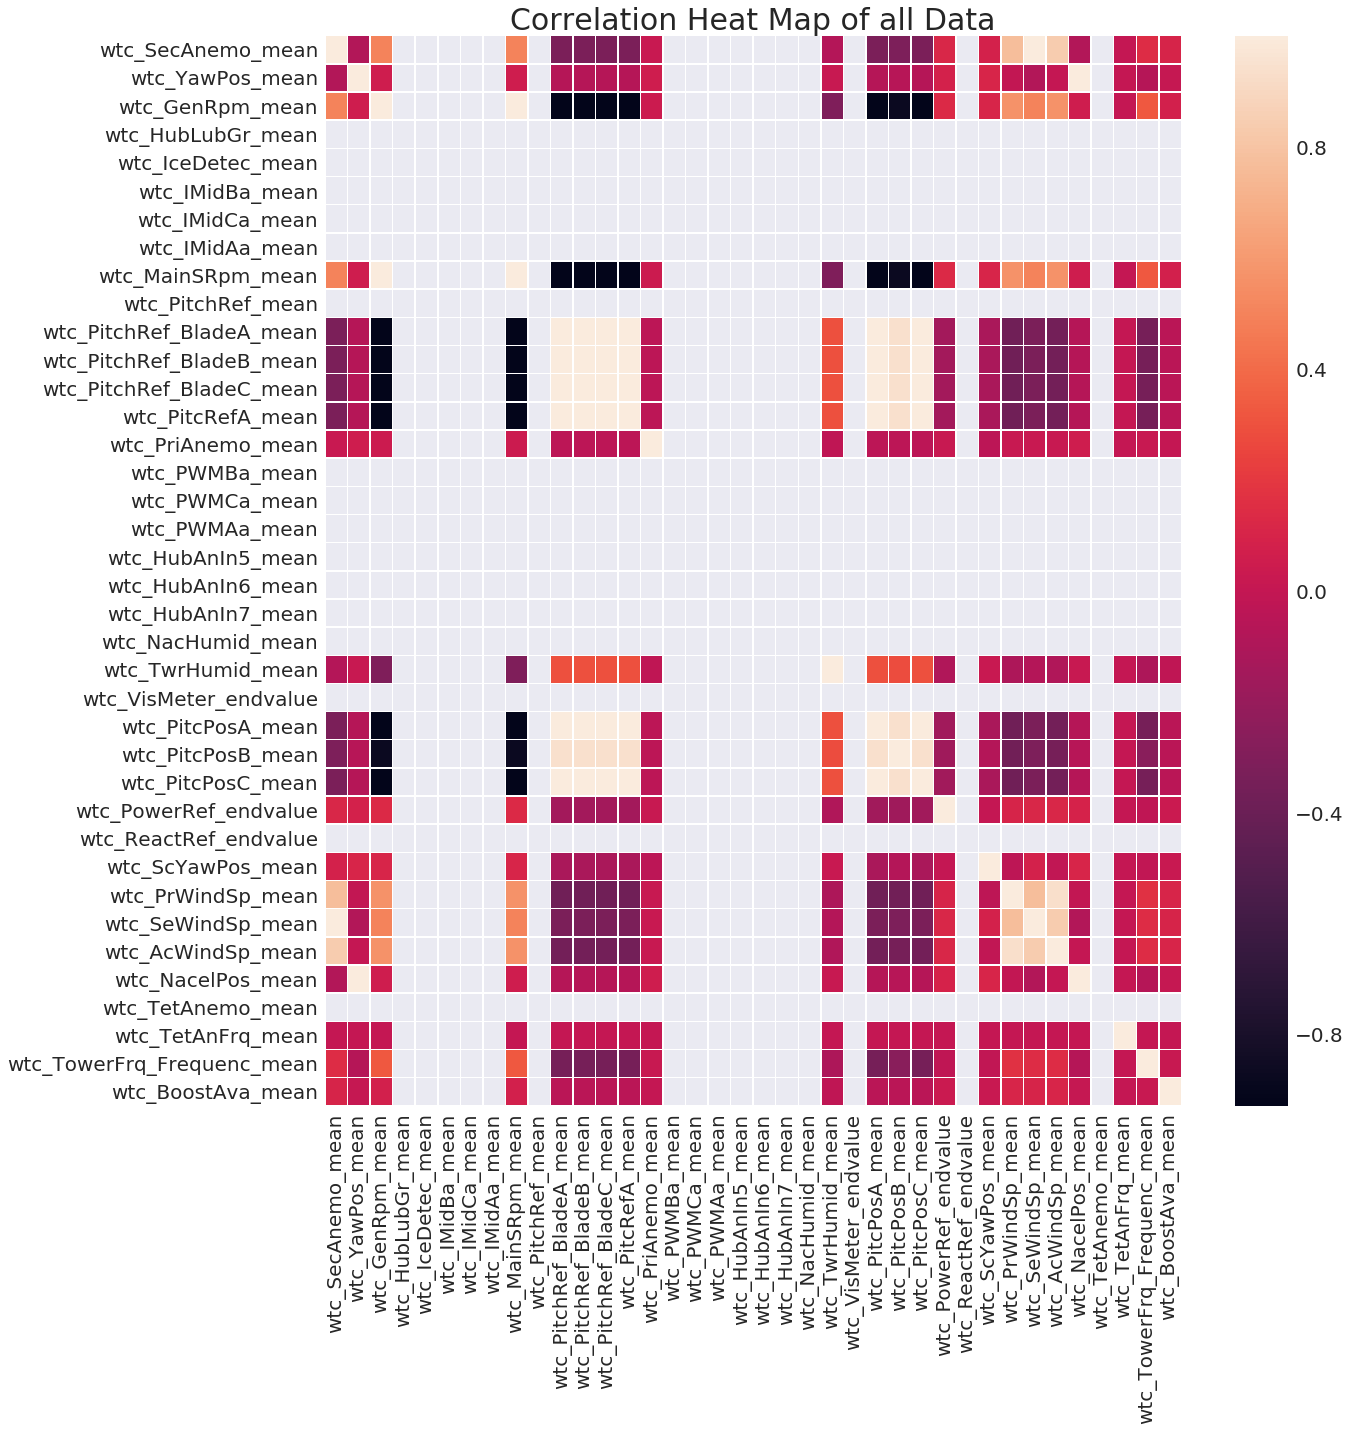

In [18]:
# plot the correlation matricies
sbn.set(font_scale=2)
f, ax = plt.subplots(figsize=(20, 20)) #taken from Notebook 2: DataVisualization
sbn.heatmap(df_main2.corr(), linewidths=0.5)
f.tight_layout()
plt.title("Correlation Heat Map of all Data", size=30)

# Principal Component Analysis - What variables are the most important for explaining variance in power output?

## Exceptional Work 

Finally, I wanted to attempt a principal component analysis on this data set. I used several tools from Scikit Learn in order to work with this data. I chose to impute missing data with the mean value of the column. Better results may be obtained through grouping by turbine.


Based on the results of the PCA I believe that we can use only a small subset of the data to make meaningful models. The first four principal components explain around 99 percent of the variation in the data.

In [19]:
# First I am going to attempt to do a PAC on the df_main2 dataframe
# the df_main2 dataframe only has 100 rows for now. Just to see how we might use PCA in the future

#First drop the columns that cannot be converted into fload values
df_pca = df_main2.drop(["Name", "TimeStamp", "wtc_CurTime_endvalue"], axis=1)
df_pca.head()

#Next I need to address the NaN data. I will use the imputer method in sklearn.preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean')
imp.fit(df_pca)
new = imp.transform(df_pca)

#Finally, I will create the PAC itself
pca = PCA()
pca.fit(new)

print("The explained variance ratios are shown below:")
print(pca.explained_variance_ratio_)
print("\n")

print("The first four eigenvectors explain " + str(round(sum(pca.explained_variance_ratio_[0:3]) * 100,2)) + " percent of the variation in the data set")
print("\n")

print("The Eigenvalues are: ")
print(pca.explained_variance_)
print("\n")

print("The Eigenvectors are: ")
print(pca.components_)



The explained variance ratios are shown below:
[5.80550532e-01 3.84476490e-01 2.62283728e-02 6.42445924e-03
 1.90857804e-03 1.77603044e-04 1.71155645e-04 2.09775615e-05
 1.88883785e-05 1.57094545e-05 3.80284173e-06 1.23989561e-06
 1.05428595e-06 5.81602039e-07 4.04765869e-07 1.35132608e-07
 1.39992338e-08 9.26373900e-10 6.28877138e-10 3.80139316e-11
 2.71935053e-11 2.01133247e-41]


The first four eigenvectors explain 99.13 percent of the variation in the data set


The Eigenvalues are: 
[5.60882742e+05 3.71451262e+05 2.53398126e+04 6.20681253e+03
 1.84391956e+03 1.71586239e+02 1.65357264e+02 2.02668874e+01
 1.82484813e+01 1.51772524e+01 3.67400971e+00 1.19789064e+00
 1.01856903e+00 5.61898626e-01 3.91053281e-01 1.30554609e-01
 1.35249701e-02 8.94990366e-04 6.07572148e-04 3.67261022e-05
 2.62722485e-05 1.94319290e-35]


The Eigenvectors are: 
[[-1.14879747e-03 -7.10029690e-03 -3.22499012e-01 -3.55994093e-03
   2.53359048e-02  2.53362668e-02  2.53385698e-02  2.55858465e-02
  -2.27983960

# Plotting Cumulative Explained Variance of the PCA

Text(0.5,1,'Variance Explained by PCA components')

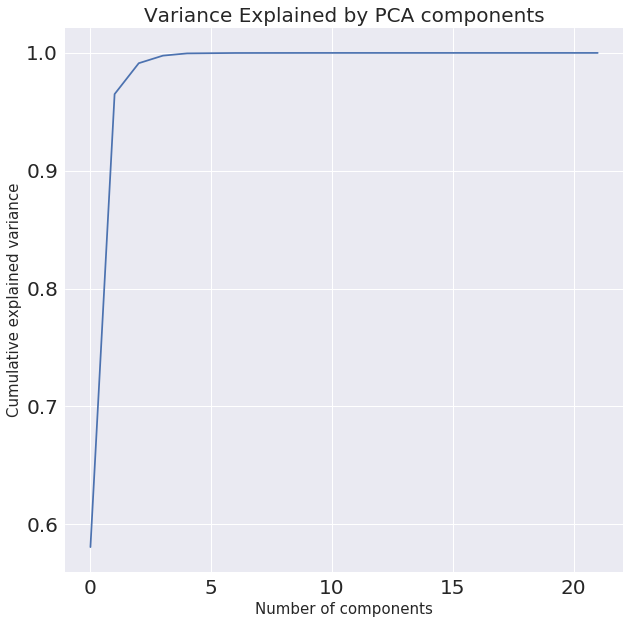

In [21]:
#To start I want to plot the explained variance of the PCA
# code borrowed from: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components', fontsize=15)
plt.ylabel('Cumulative explained variance', fontsize=15)
plt.title("Variance Explained by PCA components", fontsize=20)

